In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("/kaggle/input/fuelconsumption/FuelConsumption (1).csv")

In [15]:
data.head(2)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [17]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


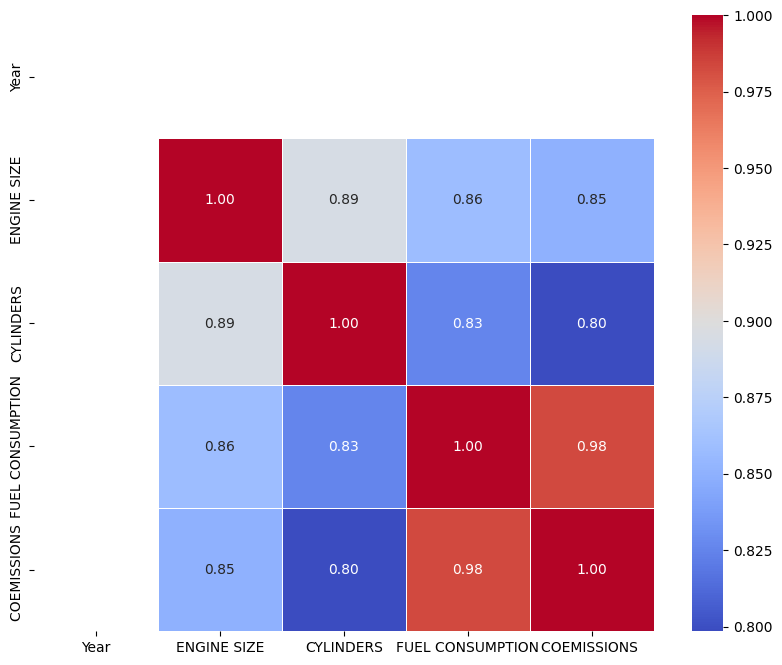

In [18]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

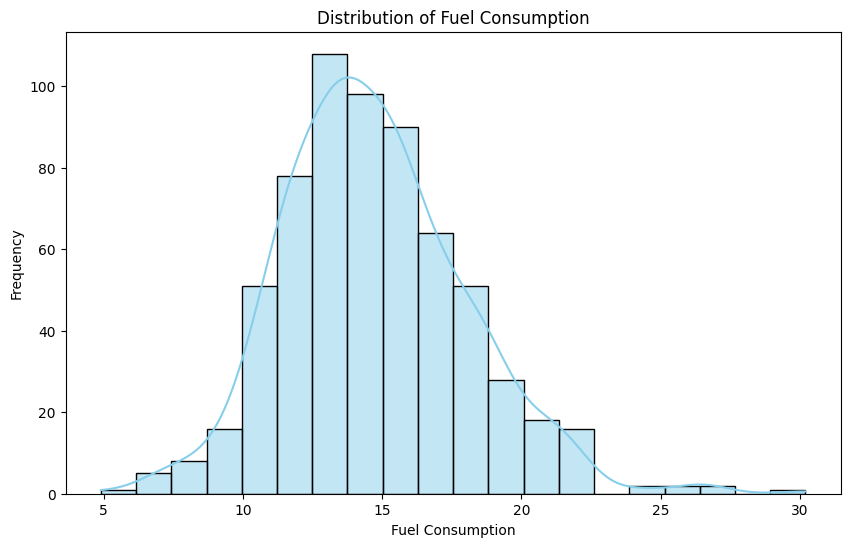

In [19]:
# Distribution of Fuel Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data['FUEL CONSUMPTION'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.show()

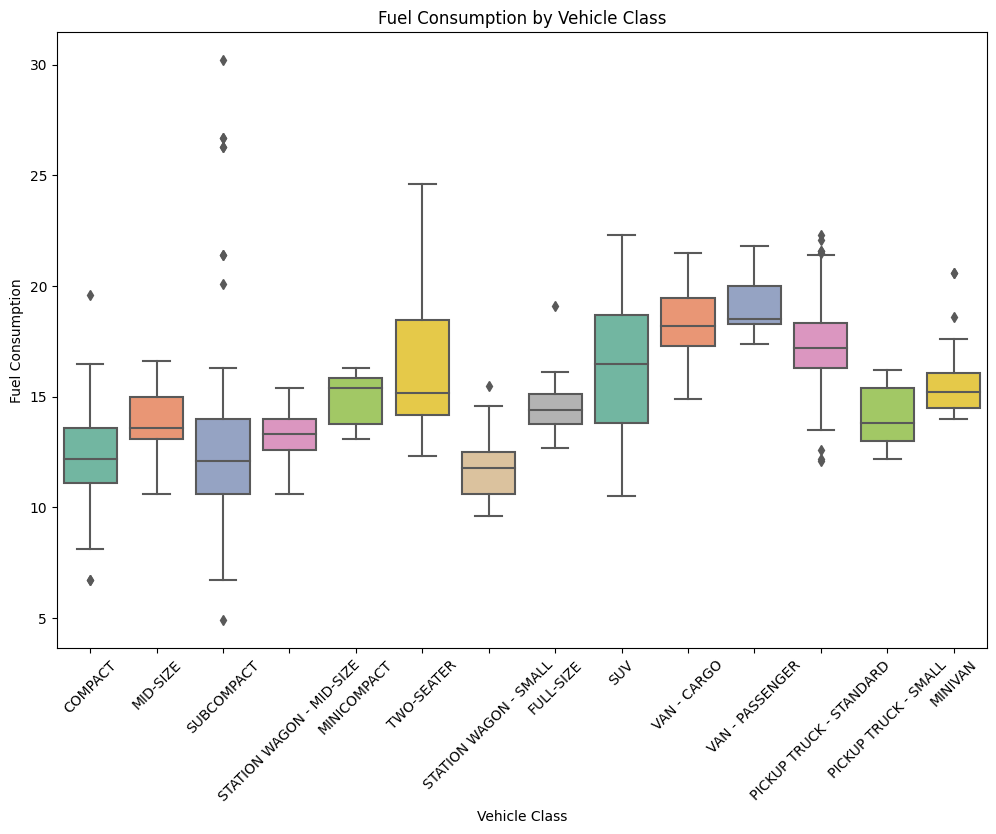

In [20]:
# Boxplot of Fuel Consumption by Vehicle Class
plt.figure(figsize=(12, 8))
sns.boxplot(x='VEHICLE CLASS', y='FUEL CONSUMPTION', data=data, palette='Set2')
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)
plt.show()

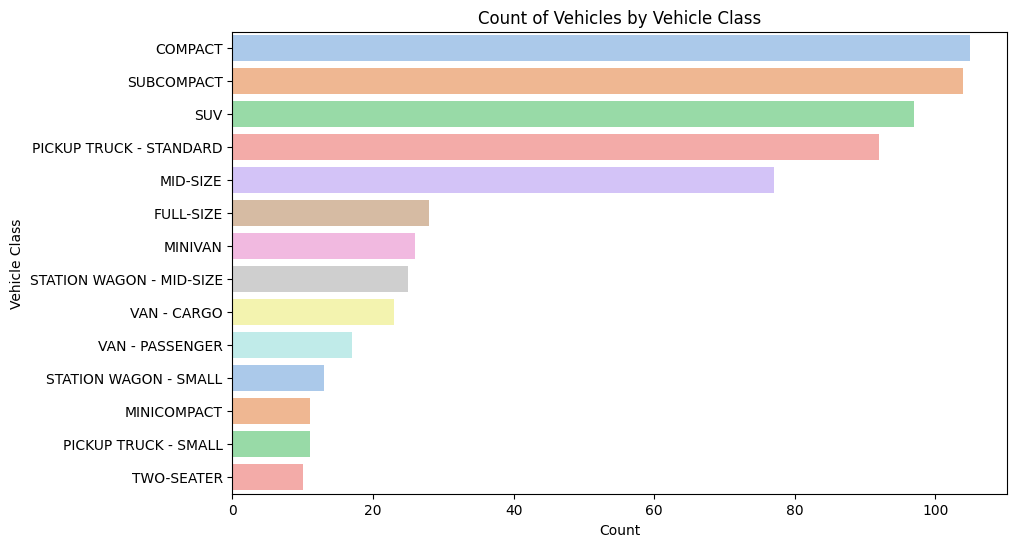

In [26]:
# Count plot of Vehicle Class
plt.figure(figsize=(10, 6))
sns.countplot(y='VEHICLE CLASS', data=data, order=data['VEHICLE CLASS'].value_counts().index, palette='pastel')
plt.title('Count of Vehicles by Vehicle Class')
plt.xlabel('Count')
plt.ylabel('Vehicle Class')
plt.show()

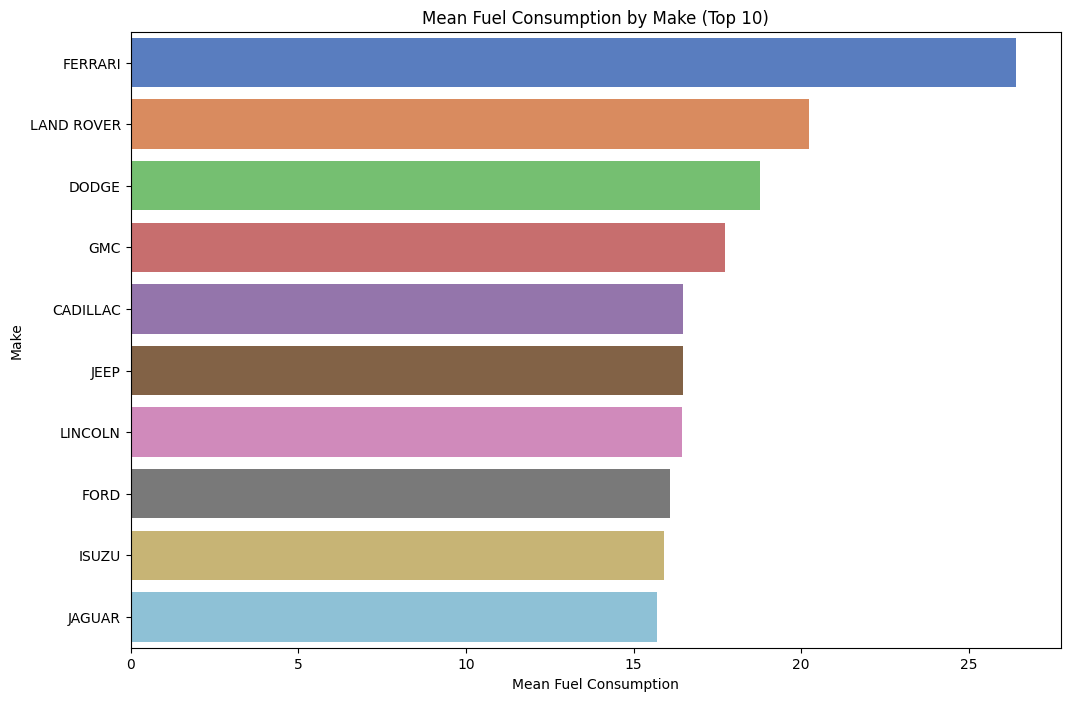

In [27]:
# Bar plot of Mean Fuel Consumption by Make
plt.figure(figsize=(12, 8))
mean_fuel_consumption_by_make = data.groupby('MAKE')['FUEL CONSUMPTION'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=mean_fuel_consumption_by_make.values, y=mean_fuel_consumption_by_make.index, palette='muted')
plt.title('Mean Fuel Consumption by Make (Top 10)')
plt.xlabel('Mean Fuel Consumption')
plt.ylabel('Make')
plt.show()

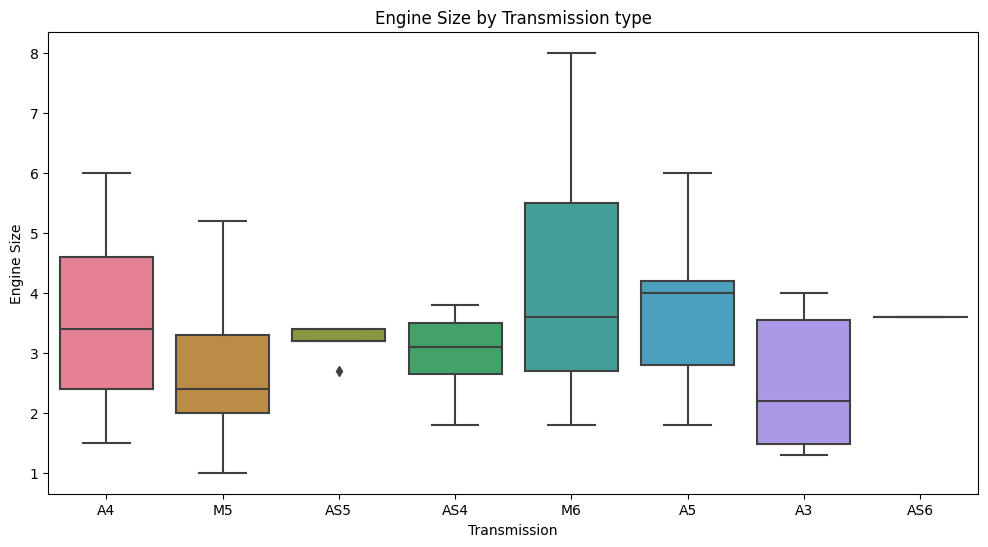

In [40]:
# Box plot of Engine Size by Transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='TRANSMISSION', y='ENGINE SIZE', data=data, palette='husl')
plt.title('Engine Size by Transmission type')
plt.xlabel('Transmission')
plt.ylabel('Engine Size')
plt.show()

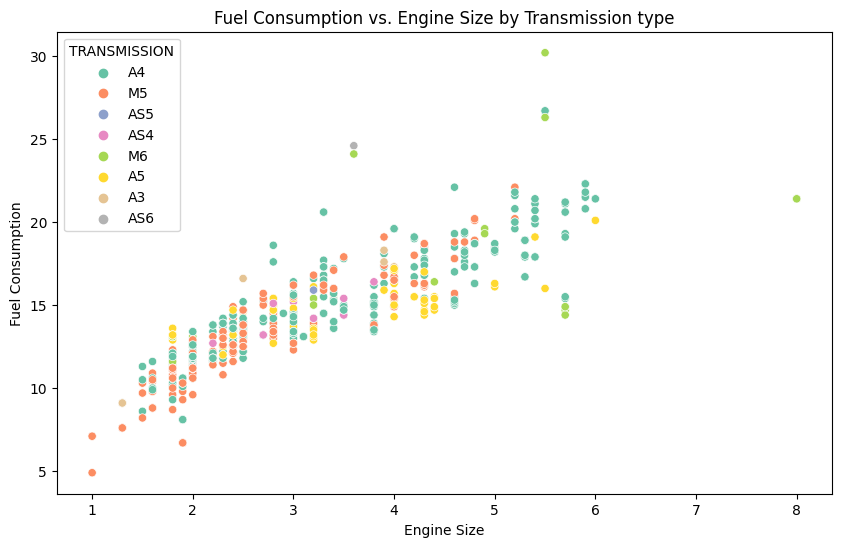

In [48]:
# Scatter plot of Fuel Consumption vs. Engine Size colored by Transmission type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ENGINE SIZE', y='FUEL CONSUMPTION', hue='TRANSMISSION', data=data, palette='Set2')
plt.title('Fuel Consumption vs. Engine Size by Transmission type')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption')
plt.show()

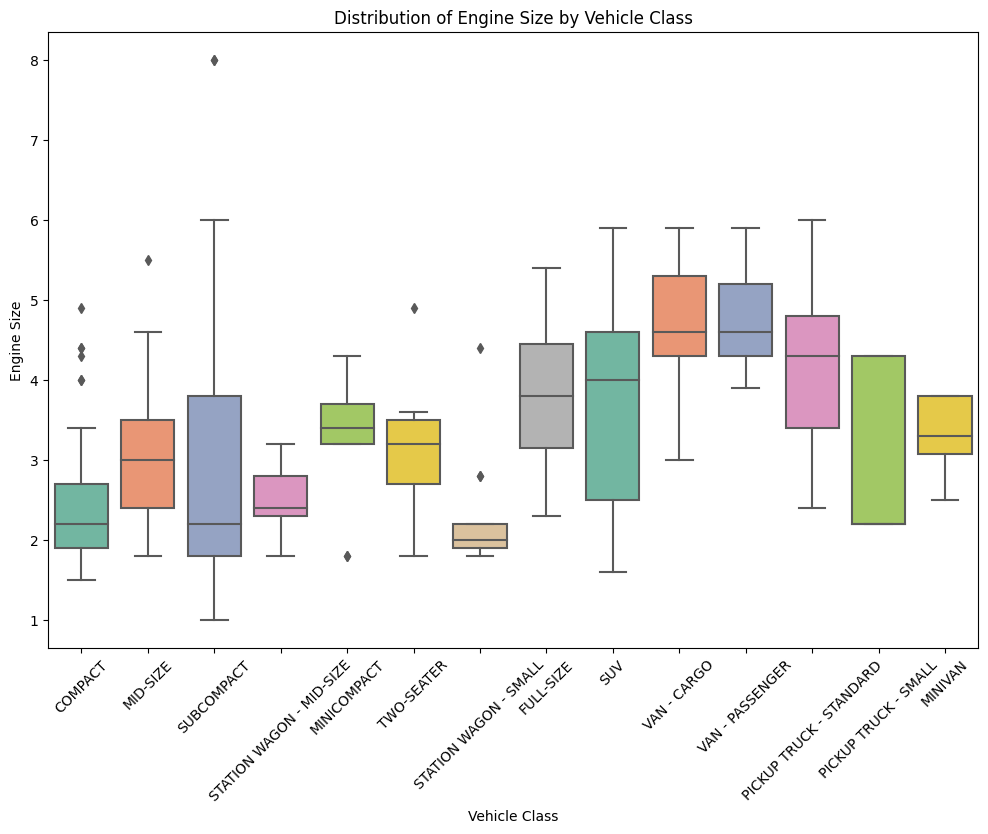

In [53]:
# Distribution of Engine Size by Vehicle Class
plt.figure(figsize=(12, 8))
sns.boxplot(x='VEHICLE CLASS', y='ENGINE SIZE', data=data, palette='Set2')
plt.title('Distribution of Engine Size by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Engine Size')
plt.xticks(rotation=45)
plt.show()

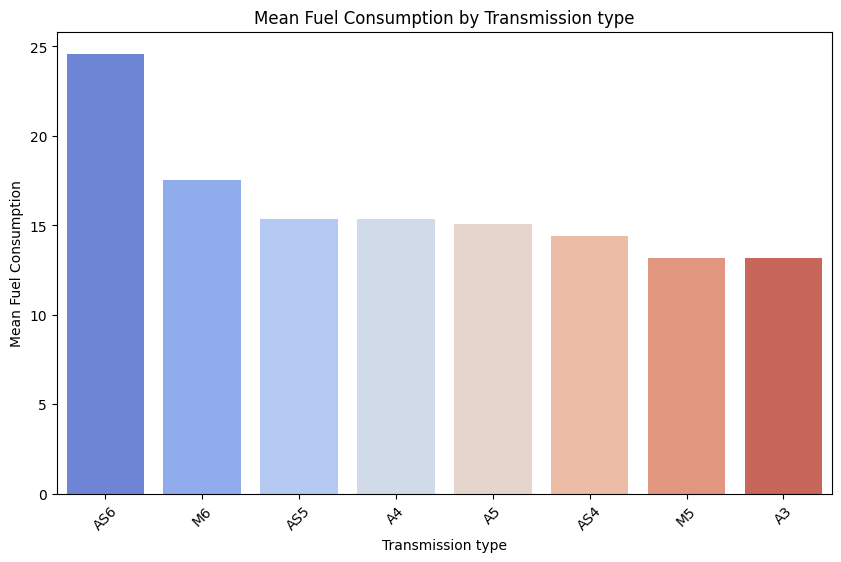

In [58]:
# Bar plot of mean Fuel Consumption by Transmission type
mean_fuel_consumption_by_transmission = data.groupby('TRANSMISSION')['FUEL CONSUMPTION'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_fuel_consumption_by_transmission.index, y=mean_fuel_consumption_by_transmission.values, palette='coolwarm')
plt.title('Mean Fuel Consumption by Transmission type')
plt.xlabel('Transmission type')
plt.ylabel('Mean Fuel Consumption')
plt.xticks(rotation=45)
plt.show()

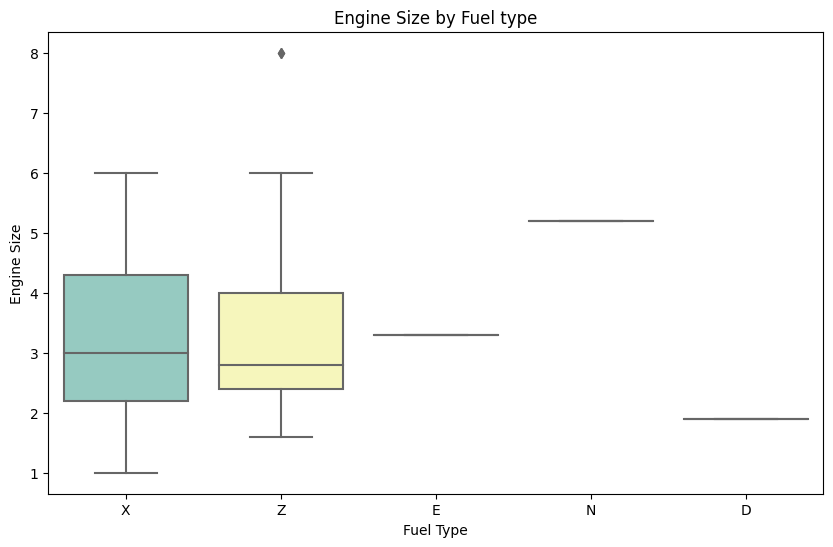

In [61]:
# Box plot of Engine Size by Fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='FUEL', y='ENGINE SIZE', data=data, palette='Set3')
plt.title('Engine Size by Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Engine Size')
plt.show()

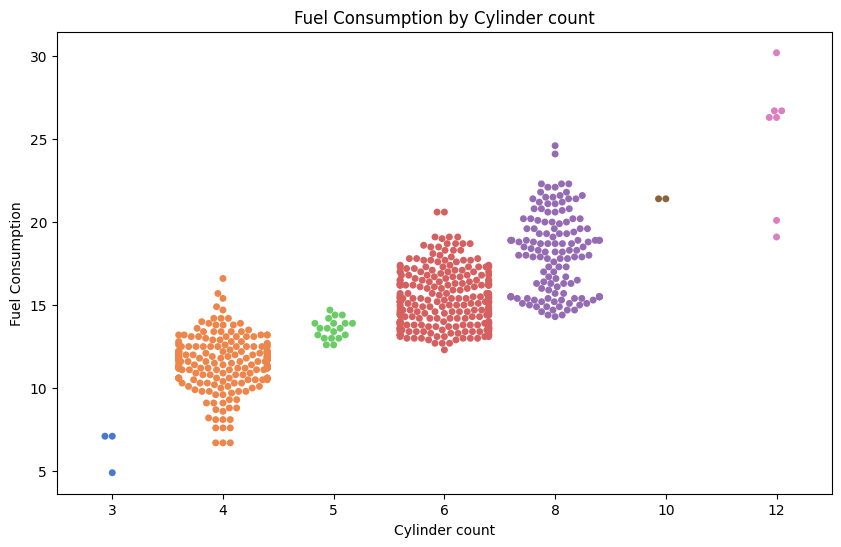

In [65]:
# Swarm plot of Fuel Consumption by Cylinder count
plt.figure(figsize=(10, 6))
sns.swarmplot(x='CYLINDERS', y='FUEL CONSUMPTION', data=data, palette='muted')
plt.title('Fuel Consumption by Cylinder count')
plt.xlabel('Cylinder count')
plt.ylabel('Fuel Consumption')
plt.show()